# 1 Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from utils import *


In [2]:
data = pd.read_csv('../data/ex2data1.txt', header = None)
data.columns = ['exam1', 'exam2', 'admitted']
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 1.1 Visualizing the data

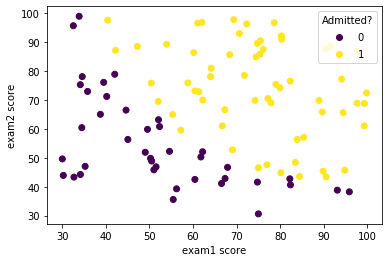

In [3]:
scatter = plt.scatter('exam1', 'exam2', c='admitted', data=data)
plt.gca().legend(*scatter.legend_elements(), title="Admitted?")
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.show()

## 1.2 Implementation
done in utils.py

### 1.2.3 Learning parameters using fminunc
python has minimize instead of fminunc

In [4]:
X,y = get_data(data)
init_theta = np.zeros(X.shape[1])

op_result = minimize(cost_function, init_theta , args=(X,y), jac=compute_grad, method='TNC')

### 1.2.4 Evaluating logistic regression

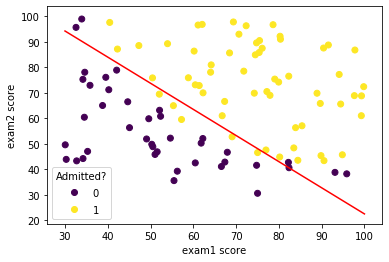

In [5]:
theta = op_result.x

exam1_range = np.array([30,100])
exam2_range = (-theta[0]-theta[1]*exam1_range)/theta[2]

plt.plot(exam1_range,exam2_range, c='r')

scatter = plt.scatter('exam1', 'exam2', c='admitted', data=data)
plt.gca().legend(*scatter.legend_elements(), title="Admitted?")
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.show()

In [6]:
x = np.array([1,45,85])
sig(x.dot(theta))

0.7762906217710582

In [7]:
acc = 1-(np.abs((X.dot(theta)>0)-y).sum()/len(y))
print('The accuracy is: ' + str(acc))

The accuracy is: 0.89
